<a href="https://colab.research.google.com/github/divya034/sentiment-analysis/blob/master/sanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis with an RNN**

In this notebook, you'll implement a recurrent neural network that performs sentiment analysis. Using an RNN rather than a feedfoward network is more accurate since we can include information about the sequence of words. Here we'll use a dataset of movie reviews, accompanied by labels.

# **Getting data**
 Keras has a built-in IMDb movie reviews data set that we can use.
 Alternatively, data sets on amazon product review or twitter API can also be used.

 link to downlodable amazon product review:  http://www.cs.jhu.edu/~mdredze/datasets/sentiment/unprocessed.tar.gz 

In [0]:
import numpy as np
import keras as K
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
def main():
  # 0. get started
  print("IMDB sentiment analysis using Keras/TensorFlow")
  np.random.seed(1)
  tf.set_random_seed(1)
from matplotlib import pyplot as plt


# **Set the vocabulary size and load in training and test data.**


In [55]:
max_words = 20000
print("Loading data, max unique words = %d words\n" % max_words)
(train_x, train_y), (test_x, test_y) = \
  K.datasets.imdb.load_data(seed=1, num_words=max_words)

Loading data, max unique words = 20000 words

17465344/17464789 [==============================] - 2s 0us/step


Review is stored as a sequence of integers. 

These are word IDs that have been pre-assigned to individual words, and the label is an integer (0 for negative, 1 for positive).

**Maximum review length**


In [0]:
max_review_len = 80
train_x = K.preprocessing.sequence.pad_sequences(train_x,
  truncating='pre', padding='pre', maxlen=max_review_len)
test_x = K.preprocessing.sequence.pad_sequences(test_x,
  truncating='pre', padding='pre', maxlen=max_review_len)

### **Defining the LSTM Model**

In [57]:

print("Creating LSTM model")
e_init = K.initializers.RandomUniform(-0.01, 0.01, seed=1)
init = K.initializers.glorot_uniform(seed=1)
simple_adam = K.optimizers.Adam()
embed_vec_len = 32  # values per word

Creating LSTM model


# **LSTM network**

In [0]:
model = K.models.Sequential()
model.add(K.layers.embeddings.Embedding(input_dim=max_words,
  output_dim=embed_vec_len, embeddings_initializer=e_init,
  mask_zero=True))
model.add(K.layers.LSTM(units=100, kernel_initializer=init,
  dropout=0.2, recurrent_dropout=0.2))  # 100 memory
model.add(K.layers.Dense(units=1, kernel_initializer=init,
  activation='sigmoid'))

In [59]:
model.compile(loss='binary_crossentropy', optimizer=simple_adam,
  metrics=['acc'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 693,301
Trainable params: 693,301
Non-trainable params: 0
_________________________________________________________________
None


# **Training and Evaluating the LSTM Model**

In [70]:
bat_size = 32
max_epochs = 3
print("\nStarting training ")


X_valid, y_valid = train_x[:bat_size], train_y[:bat_size]
X_train2, y_train2 = train_x[bat_size:], train_y[bat_size:]
history= model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size= bat_size, epochs=max_epochs)
print("Training complete \n")



Starting training 
Train on 24968 samples, validate on 32 samples
Epoch 1/3
24968/24968 [==============================] - 78s 3ms/step - loss: 0.1285 - acc: 0.9541 - val_loss: 0.3014 - val_acc: 0.9062
Epoch 2/3
24968/24968 [==============================] - 78s 3ms/step - loss: 0.1166 - acc: 0.9591 - val_loss: 0.2916 - val_acc: 0.9375
Epoch 3/3
24968/24968 [==============================] - 78s 3ms/step - loss: 0.1000 - acc: 0.9656 - val_loss: 0.4076 - val_acc: 0.8438
Training complete 



In [71]:
loss_acc = model.evaluate(test_x, test_y, verbose=0)
print("Test data: loss = %0.6f  accuracy = %0.2f%% " % \
  (loss_acc[0], loss_acc[1]*100))

Test data: loss = 0.638280  accuracy = 80.59% 


# **now we plot accuracy and loss of training and validation:**

for this we can import pyplot from matplotlib

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


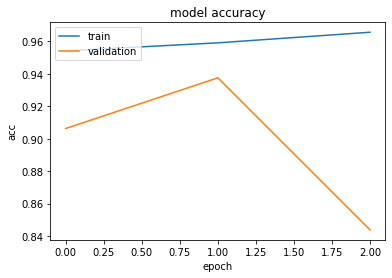

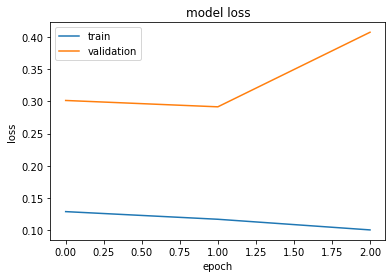

In [73]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# **New review**

In [86]:
print("New review: \'the movie was a great \'")
d = K.datasets.imdb.get_word_index()
review = "this movie was great"

New review: 'the movie was a great '


In [0]:
words = review.split()
review = []
for word in words:
  if word not in d: 
    review.append(2)
  else:
    review.append(d[word]+3)

In [88]:
review = K.preprocessing.sequence.pad_sequences([review],
  truncating='pre', padding='pre', maxlen=max_review_len)
prediction = model.predict(review)
print("Prediction (0 = negative, 1 = positive) = ", end="")
print("%0.4f" % prediction[0][0])

Prediction (0 = negative, 1 = positive) = 0.8019
